<a href="https://colab.research.google.com/github/ashishpatil243/Final-Year-Project/blob/main/Drug_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357287 sha256=8ab13ca0ff0ee9130ac9a3330b060706cd1006c5217d3f049e9bd22913362578
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


Enter your condition: ADHD
Model: Random Forest
R-squared (R2) Score: 1.00
Mean Absolute Error (MAE): 0.00
Top recommended drugs for ADHD using Random Forest:
                 drugName  rating  usefulCount  predicted_rating  price  \
18504   Dextroamphetamine      10           21              10.0   45.0   
25397    Lisdexamfetamine      10           22              10.0   71.5   
19635     Methylphenidate      10           26              10.0   19.0   
113529         Focalin XR      10           84              10.0   70.0   
19486    Lisdexamfetamine      10           20              10.0  298.5   

                                              sideEffect0  
18504                                      Abdominal pain  
25397                                                Rash  
19635                                            Diarrhea  
113529  Application site reactions (burning, irritatio...  
19486                                            Diarrhea  
------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Support Vector Machine
R-squared (R2) Score: 0.98
Mean Absolute Error (MAE): 0.14
Top recommended drugs for ADHD using Support Vector Machine:
                drugName  rating  usefulCount  predicted_rating  price  \
18975          Modafinil      10           22          9.992946  110.0   
19253   Lisdexamfetamine      10           22          9.992946   75.0   
128829           Ritalin      10           22          9.992946   47.0   
10346         Focalin XR      10           22          9.992946   11.0   
151956           Vyvanse      10           22          9.992946  495.0   

                                   sideEffect0  
18975                                     Rash  
19253   Anorgasmia (decreased orgasm) in women  
128829                       Allergic reaction  
10346                                   Nausea  
151956                          Eye irritation  
--------------------------------------------------
Model: Naive Bayes
R-squared (R2) Score: 1.00
Mean Absolute 

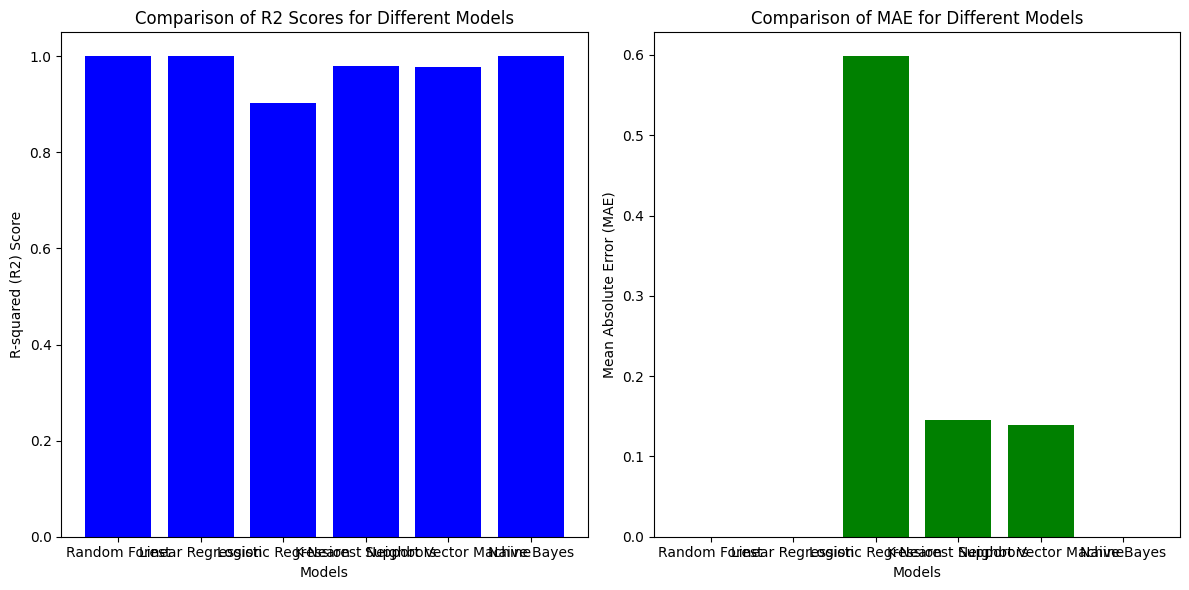

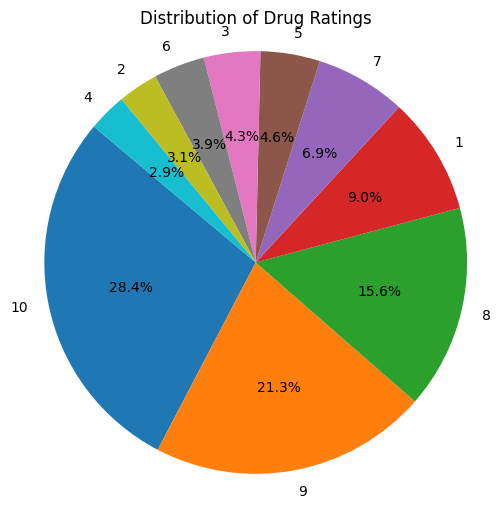

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

data = pd.read_csv('/content/New_Medicine_Prediction_Dataset.csv')  # Replace with the actual path to your dataset

user_condition = input("Enter your condition: ")

filtered_drugs = data[data['condition'] == user_condition]

if not filtered_drugs.empty:
    X = filtered_drugs[['rating', 'usefulCount']]
    y = filtered_drugs['rating']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Linear Regression': LinearRegression(),
        'Logistic Regression': LogisticRegression(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'Support Vector Machine': SVR(),
        'Naive Bayes': GaussianNB()
    }

    r2_scores = []
    mae_scores = []

    for model_name, model in models.items():
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        r2 = r2_score(y_test, predictions)
        mae = mean_absolute_error(y_test, predictions)

        r2_scores.append(r2)
        mae_scores.append(mae)

        test_set = filtered_drugs.loc[y_test.index].copy()

        test_set['predicted_rating'] = predictions

        recommended_drugs = test_set.sort_values(by='predicted_rating', ascending=False)

        # Displaying additional parameters at the end of output
        recommended_drugs_extended = recommended_drugs[['drugName', 'rating', 'usefulCount', 'predicted_rating', 'price', 'sideEffect0']].head()

        print(f"Model: {model_name}")
        print(f"R-squared (R2) Score: {r2:.2f}")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"Top recommended drugs for {user_condition} using {model_name}:")
        print(recommended_drugs_extended)
        print('-' * 50)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(models.keys(), r2_scores, color='blue')
    plt.xlabel('Models')
    plt.ylabel('R-squared (R2) Score')
    plt.title('Comparison of R2 Scores for Different Models')

    plt.subplot(1, 2, 2)
    plt.bar(models.keys(), mae_scores, color='green')
    plt.xlabel('Models')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Comparison of MAE for Different Models')

    plt.tight_layout()

    plt.figure(figsize=(6, 6))
    rating_counts = filtered_drugs['rating'].value_counts()
    labels = rating_counts.index
    sizes = rating_counts.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Drug Ratings')
    plt.axis('equal')

    plt.show()

else:
    print("No drugs found for your condition.")

MAE:  2.5454
RMSE: 3.0971
FCP:  0.3422
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  2.5484
RMSE: 3.1047
FCP:  0.3503
MAE:  3.0799
RMSE: 3.4011
FCP:  0.3472
MAE:  2.5341
RMSE: 3.0798
FCP:  0.3509
Estimating biases using als...
MAE:  2.5518
RMSE: 3.0606
FCP:  0.3464
Enter a drug name (or 'q' to quit): Lybrel
Top drug recommendations for Lybrel using SVD:
Drug: Ortho Evra, Score: 12.34, Price: 218.81, Side Effect: Headache
Drug: Ethinyl estradiol / levonorgestrel, Score: 12.34, Price: 129.0, Side Effect: Nausea
Drug: Nexplanon, Score: 12.34, Price: 30.2, Side Effect: Headache
Drug: Etonogestrel, Score: 12.34, Price: 128.0, Side Effect: Nausea
Drug: Implanon, Score: 12.34, Price: 72.0, Side Effect: Vomiting


Top drug recommendations for Lybrel using KNNBasic:
Drug: Ortho Evra, Score: 12.00, Price: 218.81, Side Effect: Headache
Drug: Ethinyl estradiol / levonorgestrel, Score: 12.00, Price: 129.0, Side Effect: Nausea
Drug: Nexplanon, Score: 12.00, Price: 30

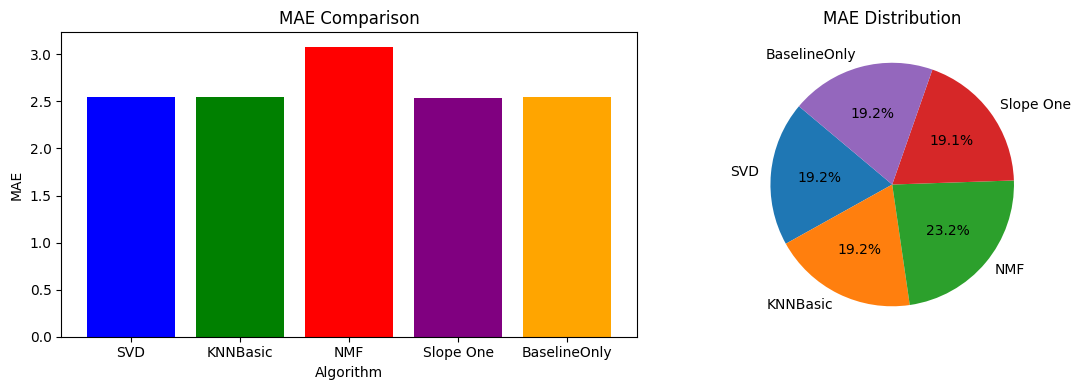

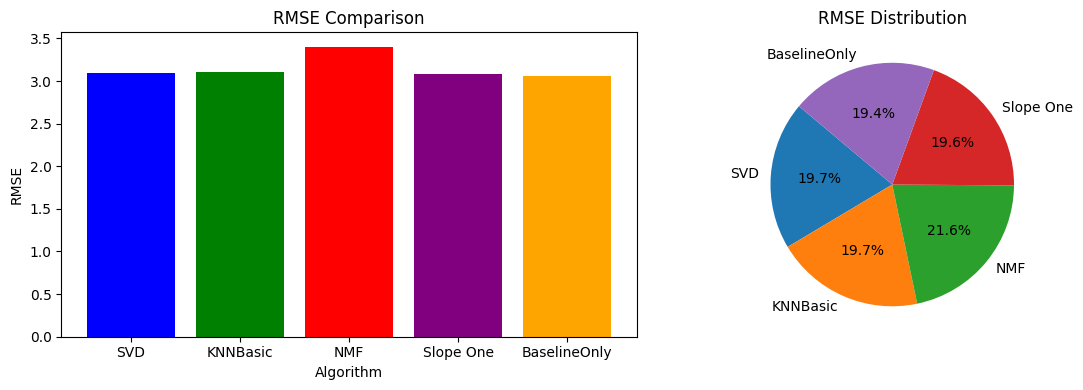

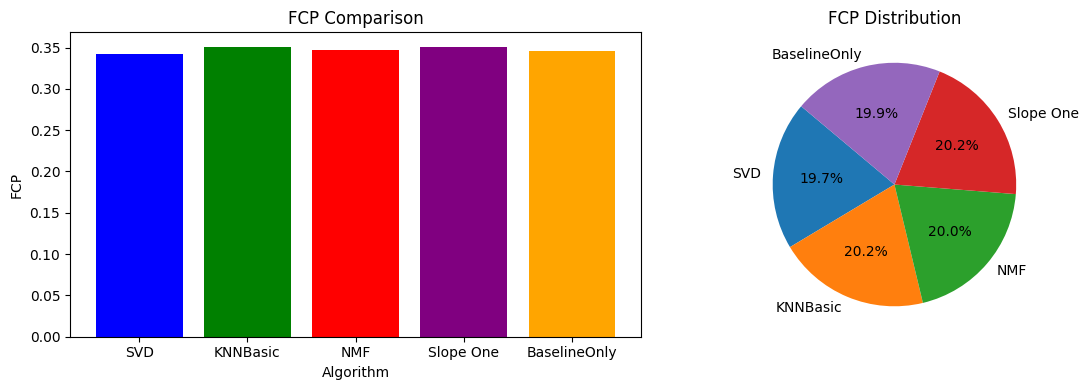

Model: SVD
MAE: 2.55
RMSE: 3.10
FCP: 0.34


Model: KNNBasic
MAE: 2.55
RMSE: 3.10
FCP: 0.35


Model: NMF
MAE: 3.08
RMSE: 3.40
FCP: 0.35


Model: Slope One
MAE: 2.53
RMSE: 3.08
FCP: 0.35


Model: BaselineOnly
MAE: 2.55
RMSE: 3.06
FCP: 0.35




In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, KNNBasic, NMF, SlopeOne, BaselineOnly
from surprise.model_selection import train_test_split
from surprise import accuracy

data = pd.read_csv('/content/New_Medicine_Prediction_Dataset.csv')

reader = Reader(rating_scale=(0, 10))

data_surprise = Dataset.load_from_df(data[['drugName', 'condition', 'rating']], reader)

trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

models = {
    'SVD': SVD(),
    'KNNBasic': KNNBasic(sim_options={'user_based': False}),
    'NMF': NMF(),
    'Slope One': SlopeOne(),
    'BaselineOnly': BaselineOnly()
}

accuracies = {}

for model_name, model in models.items():
    model.fit(trainset)
    predictions = model.test(testset)

    mae = accuracy.mae(predictions)
    rmse = accuracy.rmse(predictions)
    fcp = accuracy.fcp(predictions)

    accuracies[model_name] = {'MAE': mae, 'RMSE': rmse, 'FCP': fcp}

def recommend_drugs_ml(user_input_drug, top_n=5):
    drug_scores = {}

    user_data = data[data['drugName'] == user_input_drug]
    user_condition = user_data['condition'].values[0]

    for model_name, model in models.items():
        drug_scores[model_name] = []
        for drug in data['drugName'].unique():
            condition = data[data['drugName'] == drug]['condition'].values[0]

            if drug != user_input_drug and condition == user_condition:
                prediction = model.predict(user_input_drug, drug)
                rating = prediction.est
                useful_count = user_data['usefulCount'].values[0]
                price = data[data['drugName'] == drug]['price'].values[0]  # Get the price
                side_effect = data[data['drugName'] == drug]['sideEffect0'].values[0]  # Get the side effect

                score = (0.5 * rating) + (0.5 * useful_count)

                drug_scores[model_name].append({
                    'Drug': drug,
                    'Score': score,
                    'Price': price,  # Include price in the output
                    'Side Effect': side_effect  # Include side effect in the output
                })

    return drug_scores

user_input_drug = input("Enter a drug name (or 'q' to quit): ")

if user_input_drug.lower() != 'q':
    recommendations = recommend_drugs_ml(user_input_drug)

    if not recommendations:
        print("No recommendations found for this drug.")
    else:
        for model_name, scores in recommendations.items():
            sorted_scores = sorted(scores, key=lambda x: x['Score'], reverse=True)[:5]
            print(f"Top drug recommendations for {user_input_drug} using {model_name}:")
            for item in sorted_scores:
                print(f"Drug: {item['Drug']}, Score: {item['Score']:.2f}, Price: {item['Price']}, Side Effect: {item['Side Effect']}")
            print("\n")

    metrics = ['MAE', 'RMSE', 'FCP']

    for metric in metrics:
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        values = [accuracies[model_name][metric] for model_name in models.keys()]
        labels = models.keys()
        plt.bar(labels, values, color=['blue', 'green', 'red', 'purple', 'orange'])
        plt.title(f'{metric} Comparison')
        plt.xlabel('Algorithm')
        plt.ylabel(metric)

        plt.subplot(1, 2, 2)
        pie_labels = [model_name for model_name in models.keys()]
        pie_values = [accuracies[model_name][metric] for model_name in models.keys()]
        plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', startangle=140)
        plt.title(f'{metric} Distribution')

        plt.tight_layout()
        plt.show()

    for model_name, metrics in accuracies.items():
        print(f"Model: {model_name}")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.2f}")
        print("\n")
